# <center> <U> WordCloud
    
Based on the topics gotten from performing LDA in the Topicmodeling-wealthmanagment workbook, we separated the tweets based on different topics and created wordclouds as another set of visualizations. 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from datetime import datetime
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import math

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditya.baser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing the Final Dataset which contains the labelled topics for every tweet

In [2]:
df = pd.read_csv('combined_sent_final.csv')
df.head()

,Unnamed: 0,tweet_text,date,hashtags,username,to,replies,retweets,favorites,geo,mentions,id,topic,company,service_model,preprocessed_tweet_text,tokenized_tweet_text,polarity,sentiment,Unnamed: 0.1
0,0,We strongly believe in upholding our core valu...,2020-06-30 13:26:00+00:00,NaN,RJG_Inc,NaN,0,1,3,NaN,NaN,1277956555871105024,advisors,Betterment,roboadvisors,strongly believe upholding core values betterm...,"['strongly', 'believe', 'upholding', 'core', '...",0.466667,positive,NaN
1,1,"Based on @MichaelKitces, a Solicitor can be an...",2020-06-29 15:08:56+00:00,NaN,Paulmig87825243,BillWinterberg,0,0,0,NaN,@MichaelKitces,1277620069246349314,advisors,Betterment,roboadvisors,"based @michaelkitces, solicitor advisor (assum...","['based', 'michaelkitces', 'solicitor', 'advis...",-0.125000,negative,NaN
2,2,"For comparison, @Wealthfront (first image) lis...",2020-06-29 14:54:49+00:00,NaN,BillWinterberg,Paulmig87825243,1,0,1,NaN,@Wealthfront @Betterment,1277616517660774400,advisors,Betterment,roboadvisors,"comparison, @wealthfront (first image) lists 6...","['comparison', 'wealthfront', 'first', 'image'...",0.156250,positive,NaN
3,3,What financial advisers have been doing with t...,2020-06-29 14:38:33+00:00,NaN,Betterment_Lab,NaN,0,0,0,NaN,NaN,1277612426242846720,advisors,Betterment,roboadvisors,financial advisers clients’ money since pandem...,"['financial', 'advisers', 'clients', 'money', ...",0.000000,neutral,NaN
4,4,Betterment and M1 Finance can help your invest...,2020-06-29 11:26:19+00:00,#RoboAdvisor #investing,roboadvisorpros,NaN,0,0,0,NaN,@M1_Finance @Betterment @barbfriedberg,1277564047295217667,advisors,Betterment,roboadvisors,betterment m1 finance investment returns. with...,"['betterment', 'm1', 'finance', 'investment', ...",0.250000,positive,NaN


## Pre-processing 

In [8]:
df = df.dropna(subset = ["preprocessed_tweet_text"])

In [10]:
tokenizer = RegexpTokenizer('[a-zA-Z]\w+\'?\w*')
list_ = []
for i in range(len(df)):
    list_.append(tokenizer.tokenize(list(df["preprocessed_tweet_text"])[i]))

In [17]:
df["tokenized_tweet"] = list_
df = df.drop(columns =['tokenized_tweet_text'])

In [18]:
df_stocks = df[df["topic"] == "stocks and trading"]
df_invest = df[df["topic"] == "investment"]
df_crypto = df[df["topic"] == "cryptocurrency"]
df_digital = df[df["topic"] == "digital and fintech"]
df_advisors = df[df["topic"] == "advisors"]
df_planning = df[df["topic"] == "planning"]
df_insurance = df[df["topic"] == "insurance"]

## Building a Dictionary and Tweet Corpus

In [20]:
# build a dictionary where for each tweet, each word has its own id.
dict_stocks = Dictionary(df_stocks.tokenized_tweet)
dict_invest = Dictionary(df_invest.tokenized_tweet)
dict_crypto = Dictionary(df_crypto.tokenized_tweet)
dict_digital = Dictionary(df_digital.tokenized_tweet)
dict_advisors = Dictionary(df_advisors.tokenized_tweet)
dict_planning = Dictionary(df_planning.tokenized_tweet)
dict_insurance = Dictionary(df_insurance.tokenized_tweet)

In [22]:
# build the corpus i.e. vectors with the number of occurence of each word per tweet
corpus_stocks = [dict_stocks.doc2bow(tweet) for tweet in df_stocks.tokenized_tweet]
corpus_invest = [dict_invest.doc2bow(tweet) for tweet in df_invest.tokenized_tweet]
corpus_crypto = [dict_crypto.doc2bow(tweet) for tweet in df_crypto.tokenized_tweet]
corpus_digital = [dict_digital.doc2bow(tweet) for tweet in df_digital.tokenized_tweet]
corpus_advisors = [dict_advisors.doc2bow(tweet) for tweet in df_advisors.tokenized_tweet]
corpus_planning = [dict_planning.doc2bow(tweet) for tweet in df_planning.tokenized_tweet]
corpus_insurance = [dict_insurance.doc2bow(tweet) for tweet in df_insurance.tokenized_tweet]

In [23]:
lda_stocks = LdaModel(corpus_stocks, id2word=dict_stocks, num_topics=1, passes=10)
lda_invest = LdaModel(corpus_invest, id2word=dict_invest, num_topics=1, passes=10)
lda_crypto = LdaModel(corpus_crypto, id2word=dict_crypto, num_topics=1, passes=10)
lda_digital = LdaModel(corpus_digital, id2word=dict_digital, num_topics=1, passes=10)
lda_advisors = LdaModel(corpus_advisors, id2word=dict_advisors, num_topics=1, passes=10)
lda_planning = LdaModel(corpus_planning, id2word=dict_planning, num_topics=1, passes=10)
lda_insurance = LdaModel(corpus_insurance, id2word=dict_insurance, num_topics=1, passes=10)

## Building WordCloud

In [56]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
#         freq = int(prob/prob_total*1000)
        freq = int(prob/prob_total*100)
        alist=[word]
        word_list.extend(alist*freq)
        
#     print(word_list)
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    from random import shuffle
    shuffle(word_list)
    text = ' '.join(word_list)
    stop_words = ["morgan", "stanley", "wealthfront", "goldman", "tdameritrade", "jpmorgan", "wells", "fargo", "sachs", "chase"] + list(STOPWORDS)
    wordcloud = WordCloud(stopwords=stop_words,background_color='white',max_words=20).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)

    return None

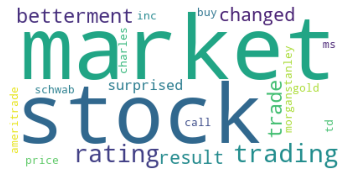

In [57]:
draw_wordcloud(lda_stocks,0)

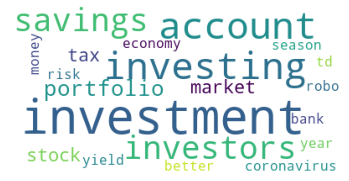

In [58]:
draw_wordcloud(lda_invest,0)

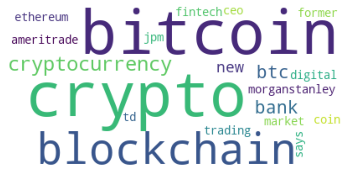

In [59]:
draw_wordcloud(lda_crypto,0)

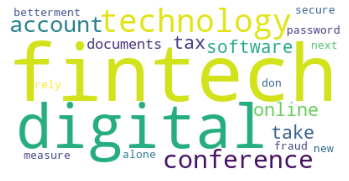

In [60]:
draw_wordcloud(lda_digital, 0)

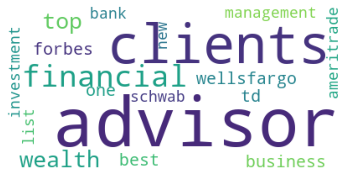

In [61]:
draw_wordcloud(lda_advisors, 0)

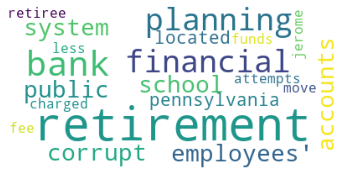

In [62]:
draw_wordcloud(lda_planning, 0)

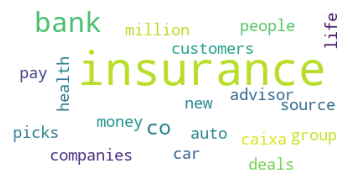

In [63]:
draw_wordcloud(lda_insurance, 0)